In [2]:
import matplotlib.pyplot as plt
import numpy as np

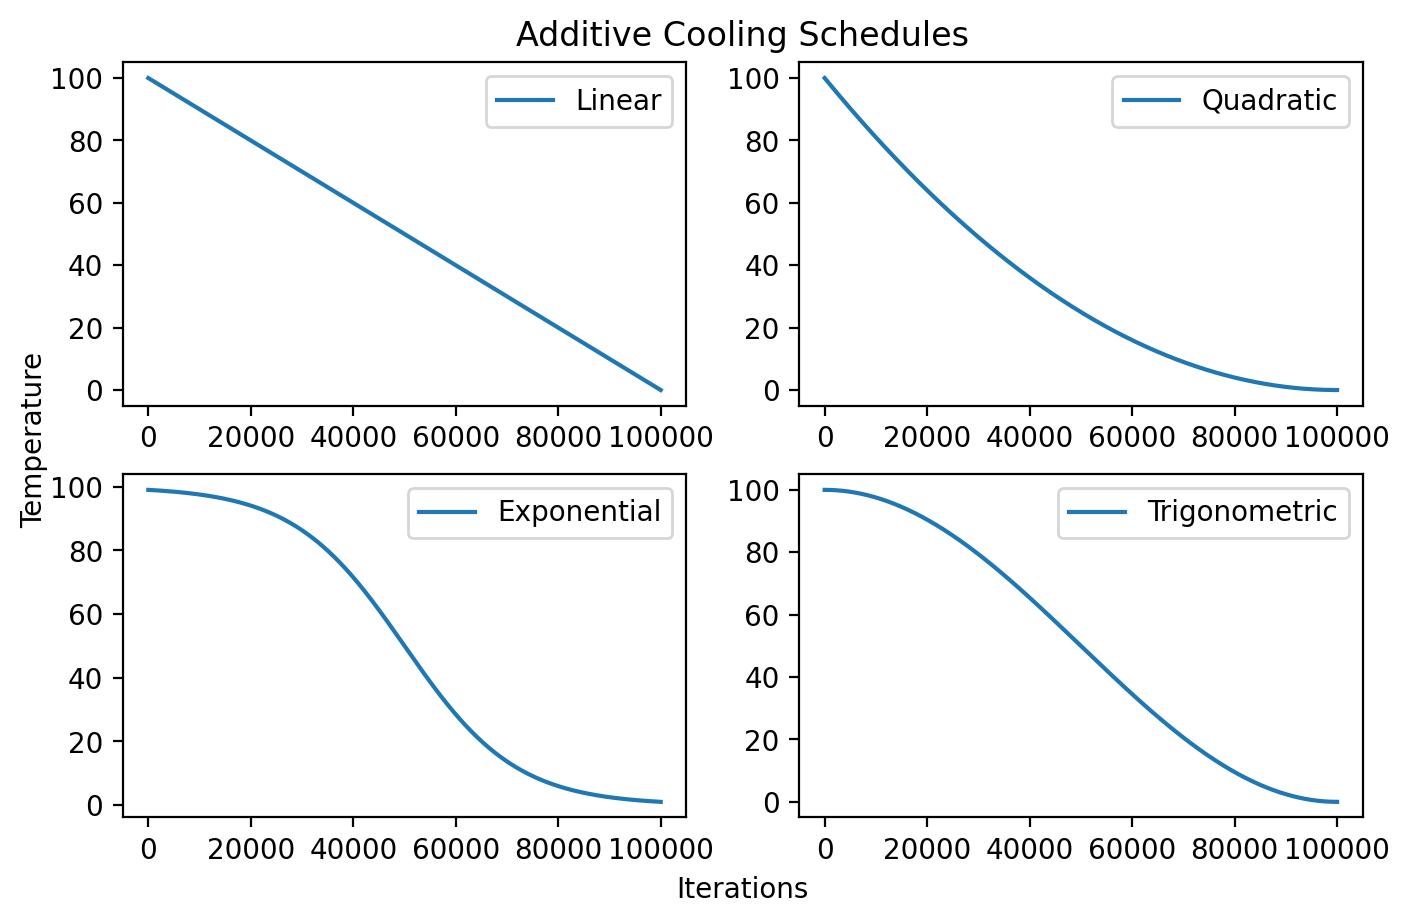

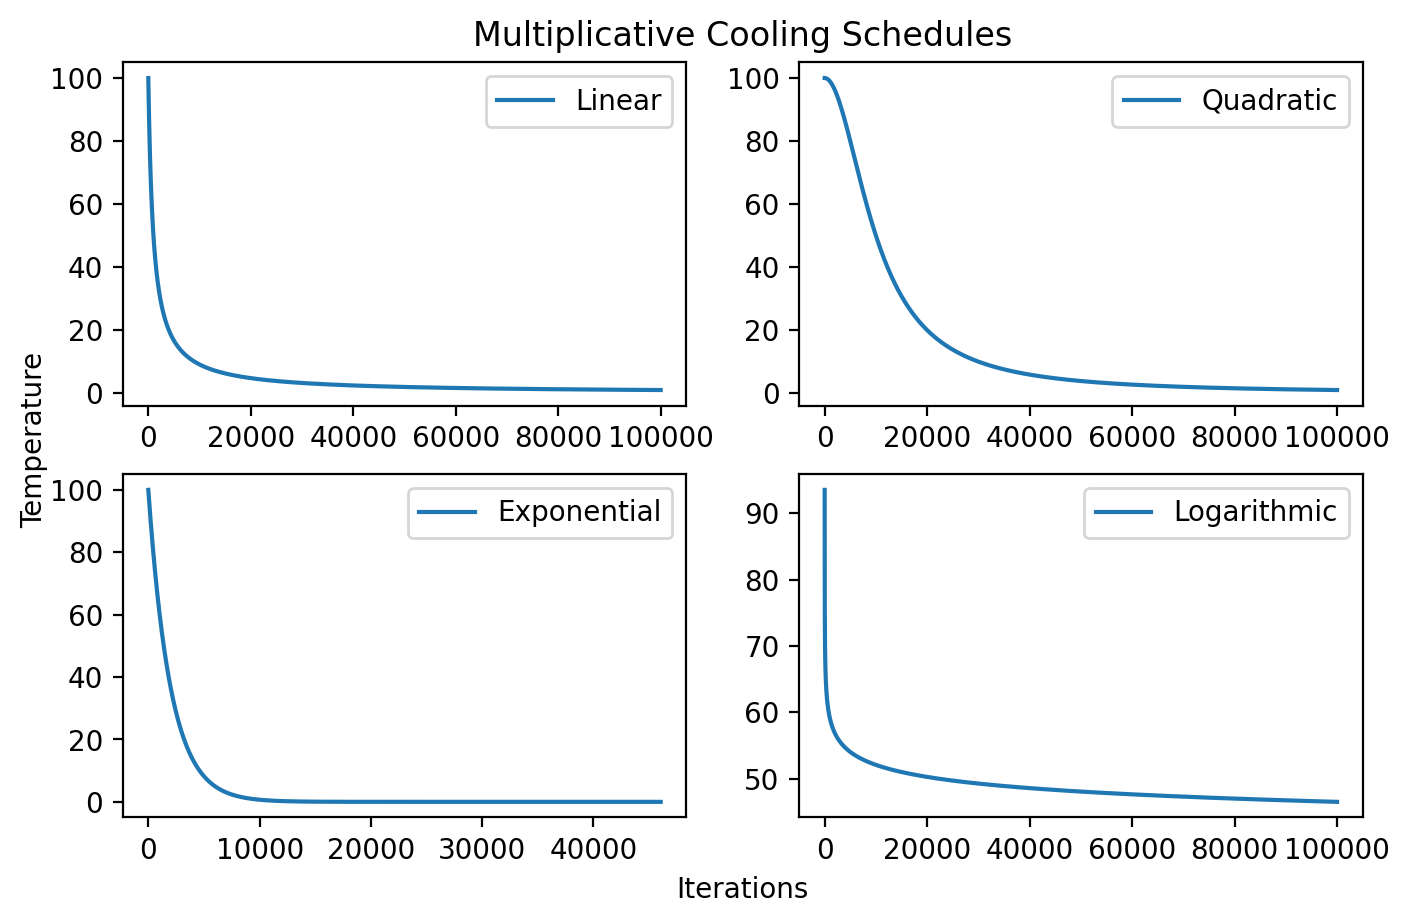

In [7]:
stopping_temp = 1e-8
stopping_iter=100000
T_start = 100
i=1

def cooling_linear_a(step):
    return stopping_temp + (T_start - stopping_temp) * ((stopping_iter - step)/stopping_iter)

# quadratic additive cooling
def cooling_quadratic_a(step):
    return stopping_temp + (T_start - stopping_temp) * ((stopping_iter - step)/stopping_iter)**2

# exponential additive cooling
def cooling_exponential_a(step):
    return stopping_temp + (T_start - stopping_temp)*(1/(1+np.exp((2*np.log(T_start - stopping_temp)/stopping_iter)*(step-(stopping_iter/2)))))

# trignometric additive cooling
def cooling_trigonometric_a(step):
    return stopping_temp + 0.5*(T_start - stopping_temp) * (1+ np.cos((step*np.pi)/stopping_iter))

# linear multiplicative cooling
def cooling_linear_m(alpha,step):
    return T_start/(1 + alpha * step)

# quadratic multiplicative cooling
def cooling_quadratic_m(alpha,step):
    return T_start/(1 + (alpha * step**2))

# exponential multiplicative cooling
def cooling_exponential_m(alpha,step):
    return T_start * alpha**step

# logarithmical multiplicative cooling
def cooling_logarithmic_m(alpha,step):
    return T_start / (1+(alpha * np.log(step + 1)))

t_lin_a=[]; t_quad_a=[];t_exp_a=[];t_tri_a=[];t_lin_m=[]; t_quad_m=[];t_exp_m=[];t_log_m=[]
    
t = T_start    
while i<=stopping_iter and t>=stopping_temp:
    t=cooling_linear_a(i)
    t_lin_a.append(t)
    i+=1
    
x = T_start ; i=1 
while i<=stopping_iter and x>=stopping_temp:  
    x=cooling_quadratic_a(i)
    t_quad_a.append(x)
    i+=1
    
y = T_start ; i=1  
while i<=stopping_iter and y>=stopping_temp: 
    y=cooling_exponential_a(i)
    t_exp_a.append(y)
    i+=1
    
z = T_start ; i=1  
while i<=stopping_iter and z>=stopping_temp:
    z=cooling_trigonometric_a(i)
    t_tri_a.append(z)
    i+=1
    
a = T_start ; i=1  
while i<=stopping_iter and a>=stopping_temp:
    a=cooling_linear_m(10**-3,i)
    t_lin_m.append(a)
    i+=1
    
b = T_start  ; i=1 
while i<=stopping_iter and b>=stopping_temp:
    b=cooling_quadratic_m(10**-8,i)
    t_quad_m.append(b)
    i+=1
    
c = T_start  ; i=1 
while i<=stopping_iter and c>=stopping_temp:
    c=cooling_exponential_m(0.9995,i)
    t_exp_m.append(c)
    i+=1
    
d = T_start  ; i=1 
while i<=stopping_iter and d>=stopping_temp:
    d=cooling_logarithmic_m(0.1,i)
    t_log_m.append(d)
    i+=1
    
fig = plt.figure(figsize=(8,5), dpi=200)
ax = fig.add_subplot(111)   
ax.set_title('Additive Cooling Schedules')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Iterations')
ax.set_ylabel('Temperature')
ax1 = fig.add_subplot(221)
ax1.plot([i for i in range (len(t_lin_a))], t_lin_a, label='Linear')
ax1.legend()
ax2 = fig.add_subplot(222)
ax2.plot([i for i in range (len(t_quad_a))], t_quad_a, label='Quadratic')
ax2.legend()
ax3 = fig.add_subplot(223)
ax3.plot([i for i in range (len(t_exp_a))], t_exp_a, label='Exponential')
ax3.legend()
ax4 = fig.add_subplot(224)
ax4.plot([i for i in range (len(t_tri_a))], t_tri_a, label='Trigonometric')
ax4.legend()
plt.show()

fig = plt.figure(figsize=(8,5), dpi=200)
ax = fig.add_subplot(111)   
ax.set_title('Multiplicative Cooling Schedules')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax.set_xlabel('Iterations')
ax.set_ylabel('Temperature')
ax1 = fig.add_subplot(221)
ax1.plot([i for i in range (len(t_lin_m))], t_lin_m, label='Linear')
ax1.legend()
ax2 = fig.add_subplot(222)
ax2.plot([i for i in range (len(t_quad_m))], t_quad_m, label='Quadratic')
ax2.legend()
ax3 = fig.add_subplot(223)
ax3.plot([i for i in range (len(t_exp_m))], t_exp_m, label='Exponential')
ax3.legend()
ax4 = fig.add_subplot(224)
ax4.plot([i for i in range (len(t_log_m))], t_log_m, label='Logarithmic')
ax4.legend()
plt.show()